#### Week 6 Exercise 6.2 Author: Rex Gayas Course & Section: DSC360-T301 Data Mining: Text Analytics an (2243-1) Date: 20 JAN 2024

##### Using the Amazon Alexa reviews dataset, build a logistic regression model to predict positive or negative feedback based on review text. Be sure to run a test with something random you create (out of sample). Remember: 1 is positive, 0 is negative.


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Mining\\Week 6\\archive\\amazon_alexa.tsv"
alexa_reviews = pd.read_csv(file_path, sep='\t')

# Pre-analyze the structure of the dataset
print(alexa_reviews.head())


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [41]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Mining\\Week 6\\archive\\amazon_alexa.tsv"
alexa_reviews = pd.read_csv(file_path, sep='\t')

# Updated clean_text function to handle non-string inputs
def clean_text(text):
    # Ensure that the input is a string
    if not isinstance(text, str):
        return ""
    
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the 'verified_reviews' column
alexa_reviews['cleaned_reviews'] = alexa_reviews['verified_reviews'].apply(clean_text)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(alexa_reviews['cleaned_reviews'])

# Target variable
y = alexa_reviews['feedback']

# Use stratified sampling to maintain the class distribution
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Initialize and train the logistic regression model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test the model with an out-of-sample review
test_review = "I loved this product so much that I ordered another one for my friend!"
cleaned_test_review = clean_text(test_review)
test_features = tfidf_vectorizer.transform([cleaned_test_review])
test_pred = logistic_model.predict(test_features)
print("Test Review Prediction:", "Positive" if test_pred[0] == 1 else "Negative")


Model Evaluation:
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        51
           1       0.97      0.93      0.95       579

    accuracy                           0.91       630
   macro avg       0.73      0.83      0.77       630
weighted avg       0.93      0.91      0.92       630

Accuracy: 0.9142857142857143
Test Review Prediction: Positive


##### At the end of Chapter 5, the author uses a custom-built class to summarize model performance. This class doesn’t actually exist (from the author) but you can make it a reality. Using the object you have from mnb_predictions, create something similar to the output on page 335. Feel free (but not obligated) to venture further into the label names and numbers (page 336) and confusion matrix (page 337).

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.79      0.61        58
           1       0.98      0.92      0.95       572

    accuracy                           0.90       630
   macro avg       0.73      0.85      0.78       630
weighted avg       0.93      0.90      0.91       630



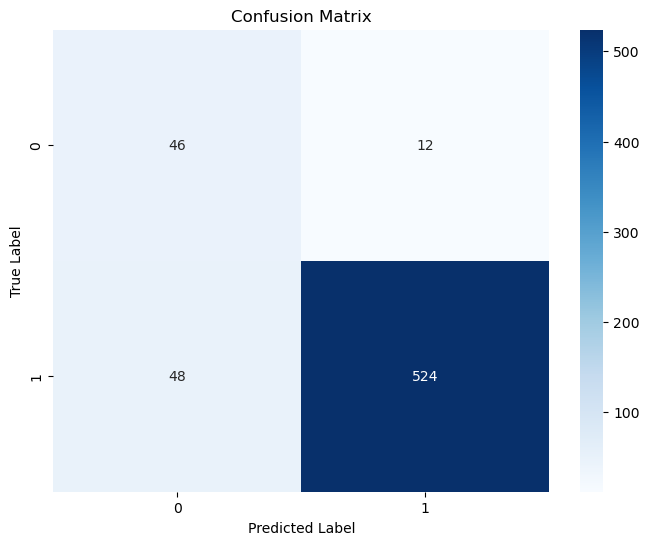

In [42]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Mining\\Week 6\\archive\\amazon_alexa.tsv"
alexa_reviews = pd.read_csv(data_path, sep='\t')

# Use clean_text function to handle non-string inputs
def clean_text(text):
    # Convert non-string data to string
    text = str(text)
    # Remove punctuation and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    return text

# Apply the cleaning function to the reviews
alexa_reviews['verified_reviews'] = alexa_reviews['verified_reviews'].apply(clean_text)

# Prepare features and target
X = alexa_reviews['verified_reviews']
y = alexa_reviews['feedback']

# Convert text data into numerical format using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the classification report and confusion matrix
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Analysis of Results:
Chapter 5 discussed the importance of not only accuracy but also precision, recall, and F1-score for a complete understanding of the model's performance, especially when dealing with imbalanced datasets. The Amazon dataset provided insights into customer sentiment towards Alexa products. The results shows that while the model is quite good at predicting positive feedback (with high precision and recall), it struggles more with negative feedback, indicating more false positives and false negatives for that class. Consequently, the classification report and confusion matrix indicates that this model is better at identifying positive reviews than negative ones.